#Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd

#Data Collection and Analysis
We collected the datasets from kaggle, the link is [Parkinson Disease Datasets](https://www.kaggle.com/code/kevinwellington/parkinson-s-disease-prediction-1-rf-95)

In [2]:
df = pd.read_csv('parkinsons.csv') 

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Here we defined the 0 and 1 as,

0 --> Non-Parkinson Disease Patient

1 --> Parkinson Disease Patient

In [9]:
df.groupby('status')

In [10]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [11]:
X = df.drop(columns = ['status', 'name'], axis=1)
Y = df['status']

In [12]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#Data Visualization

(array([12., 54., 20., 31., 17., 18., 21.,  8.,  9.,  5.]),
 array([ 88.333 , 105.5102, 122.6874, 139.8646, 157.0418, 174.219 ,
        191.3962, 208.5734, 225.7506, 242.9278, 260.105 ]),
 <BarContainer object of 10 artists>)

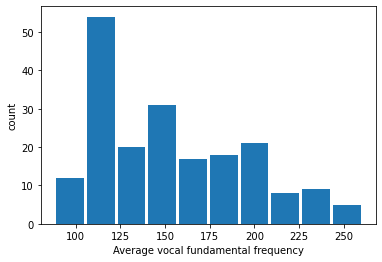

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Average vocal fundamental frequency')
plt.ylabel('count')
plt.hist(df['MDVP:Fo(Hz)'], rwidth = 0.9)

(array([69., 47., 53., 14.,  0.,  1.,  3.,  3.,  0.,  5.]),
 array([102.145 , 151.1335, 200.122 , 249.1105, 298.099 , 347.0875,
        396.076 , 445.0645, 494.053 , 543.0415, 592.03  ]),
 <BarContainer object of 10 artists>)

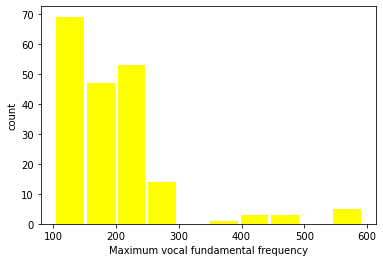

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Maximum vocal fundamental frequency')
plt.ylabel('count')
plt.hist(df['MDVP:Fhi(Hz)'], rwidth = 0.9, color = 'yellow')

(array([100.,  45.,  33.,   8.,   3.,   3.,   1.,   0.,   1.,   1.]),
 array([7.000e-06, 3.230e-05, 5.760e-05, 8.290e-05, 1.082e-04, 1.335e-04,
        1.588e-04, 1.841e-04, 2.094e-04, 2.347e-04, 2.600e-04]),
 <BarContainer object of 10 artists>)

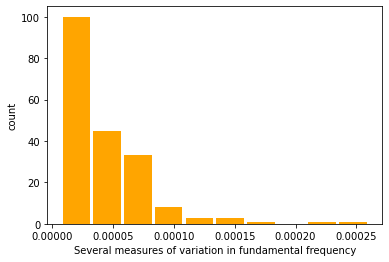

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Several measures of variation in fundamental frequency')
plt.ylabel('count')
plt.hist(df['MDVP:Jitter(Abs)'], rwidth = 0.9, color = 'orange')

(array([83., 45., 30., 13., 11.,  7.,  2.,  3.,  0.,  1.]),
 array([0.00954 , 0.020494, 0.031448, 0.042402, 0.053356, 0.06431 ,
        0.075264, 0.086218, 0.097172, 0.108126, 0.11908 ]),
 <BarContainer object of 10 artists>)

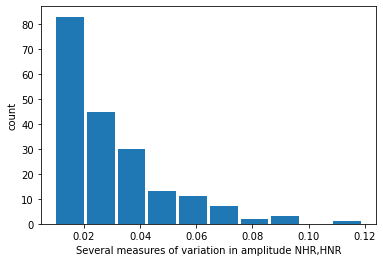

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Several measures of variation in amplitude NHR,HNR')
plt.ylabel('count')
plt.hist(df['MDVP:Shimmer'], rwidth = 0.9)

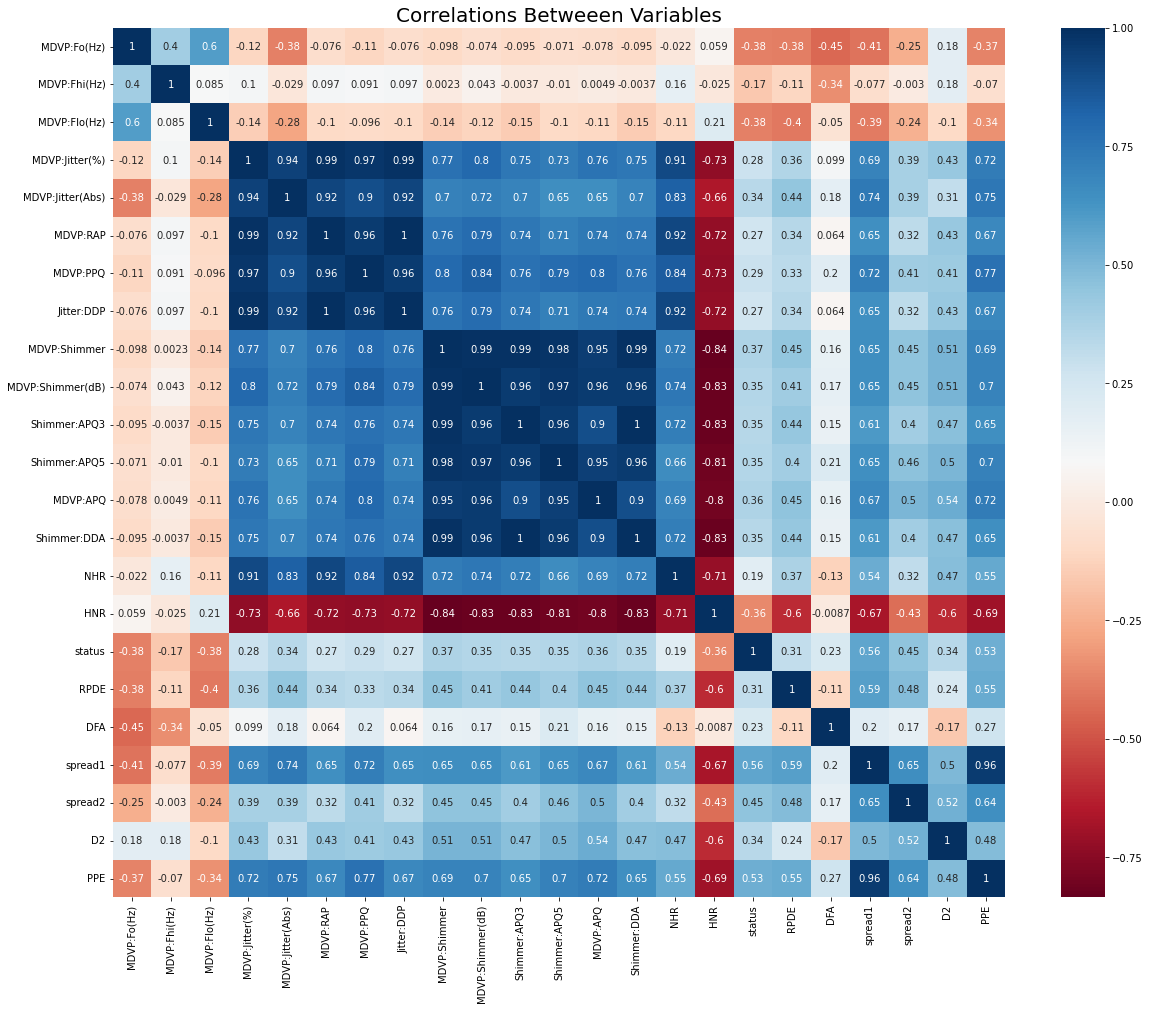

In [18]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

#Data Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
standardized_data = scaler.fit_transform(X)

In [21]:
standardized_data

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [22]:
X = standardized_data
Y = df['status']

In [23]:
print(X)
print(Y)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]
0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


#K-Fold Cross Validation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [25]:
def get_score(model, X_train, X_test, y_train, y_test) :  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [26]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [27]:
scores_logistic = []
scores_svm = []
scores_rf = []

In [28]:
for train_index, test_index in folds.split(X,Y):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)) 

    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=60), X_train, X_test, y_train, y_test))

In [29]:
scores_logistic

[0.8923076923076924, 0.8461538461538461, 0.7846153846153846]

In [30]:
scores_svm

[0.8769230769230769, 0.8923076923076924, 0.7538461538461538]

In [31]:
scores_rf

[0.8153846153846154, 0.8769230769230769, 0.7692307692307693]

In [32]:
def Average(lst):
    return sum(lst) / len(lst)

In [33]:
print("Average accuracy of Logistic Regression : ", Average(scores_logistic))
print("Average accuracy of Support Vector Machine : ", Average(scores_svm))
print("Average accuracy of Random Forest : ", Average(scores_rf))

Average accuracy of Logistic Regression :  0.841025641025641
Average accuracy of Support Vector Machine :  0.841025641025641
Average accuracy of Random Forest :  0.8205128205128206


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(SVC(C = 5), X, Y, cv = 3)

array([0.86153846, 0.95384615, 0.75384615])

In [36]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y, cv=3)

array([0.89230769, 0.84615385, 0.78461538])

In [37]:
cross_val_score(RandomForestClassifier(n_estimators = 40), X, Y, cv=3)

array([0.83076923, 0.90769231, 0.75384615])

#Train-Test-Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=10)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


#Confusion Matrix

In [40]:
classifier = SVC()
classifier.fit(X_train, Y_train)
y_predicted = classifier.predict(X_test)
y_predicted

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[ 6,  4],
       [ 0, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

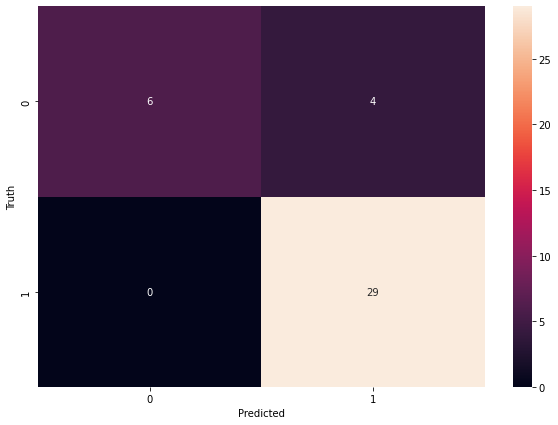

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Making a Predictive System

In [43]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
print(std_data)

classifier = SVC()
classifier.fit(X, Y)

prediction = classifier.predict(std_data)
#print(prediction)

if (prediction[0] == 0):
  print('The person does not has parkinson disease')
else:
  print('The person is likely has parkinson disease')

[[-0.82929965 -0.43616456 -0.95203729  0.33491386  0.74975946  0.13296255
   0.76080023  0.13175532  0.74598495  0.73953578  0.60785907  1.11914677
   0.33298451  0.60753214 -0.06789281 -0.19322537 -0.8078385   1.76081412
   0.80132308  0.48047686 -0.21053082  0.86888575]]
The person is likely has parkinson disease


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Saving the trained Model

In [44]:
import pickle

In [45]:
filename = 'parkinson_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open('parkinson_model.sav', 'rb'))

In [47]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
print(std_data)

classifier = SVC()
classifier.fit(X, Y)

prediction = classifier.predict(std_data)
#print(prediction)

if (prediction[0] == 0):
  print('The person does not has parkinson disease')
else:
  print('The person is likely has parkinson disease')

[[-0.82929965 -0.43616456 -0.95203729  0.33491386  0.74975946  0.13296255
   0.76080023  0.13175532  0.74598495  0.73953578  0.60785907  1.11914677
   0.33298451  0.60753214 -0.06789281 -0.19322537 -0.8078385   1.76081412
   0.80132308  0.48047686 -0.21053082  0.86888575]]
The person is likely has parkinson disease


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
